In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from key_door import key_door_env
from key_door import visualisation_env

## Basic Environment Setup

### 2D Gridworld

In [15]:
grid_env = key_door_env.KeyDoorEnv(
    map_ascii_path="maze.txt",
    map_yaml_path="maze.yaml",
    representation="agent_position",
)

In [16]:
grid_env = visualisation_env.VisualisationEnv(grid_env)

In [17]:
state = grid_env.reset_environment()

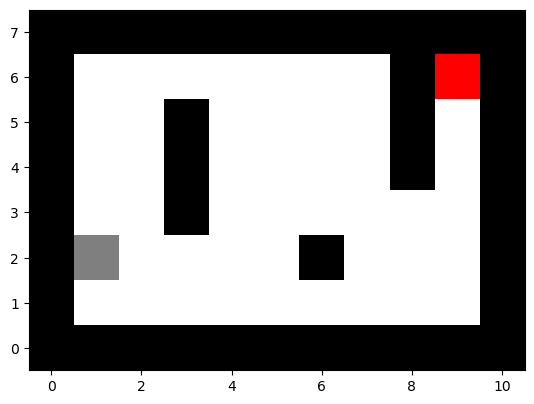

In [18]:
grid_env.render()

# Basic Q Learning

In [28]:
beta = 5
num_episodes = 100
gamma = 0.9
learning_rate = 1.

In [29]:
state_action_value_function = np.random.normal(scale=0.1, size=(len(grid_env.state_space), len(grid_env.action_space)))

state_id_mapping = {state: i for i, state in enumerate(grid_env.state_space)}
id_state_mapping = {i: state for i, state in enumerate(grid_env.state_space)}

In [30]:
def train_episode():

    episode_return = 0
    episode_length = 0

    state = grid_env.reset_environment()
    state_id = state_id_mapping[state]
    
    while grid_env.active:
        _softmax_values = np.exp(beta * state_action_value_function[state_id])
        softmax_values = _softmax_values / np.sum(_softmax_values)
        action = np.random.choice(a=range(len(grid_env.action_space)), p=softmax_values)

        reward, new_state = grid_env.step(action)
    
        if grid_env.active:
            discount = gamma
        else:
            discount = 0
    
        initial_value = state_action_value_function[state_id][action]
        new_state_id = state_id_mapping[new_state]
        new_sate_values = state_action_value_function[new_state_id]
        
        updated_value = initial_value + learning_rate * (reward + discount * np.max(new_sate_values) - initial_value)
        state_action_value_function[state_id] = updated_value
    
        state = new_state
        state_id = state_id_mapping[state]
        episode_return += reward
        episode_length += 1

    return episode_return, episode_length

In [31]:
def test_episode():

    episode_return = 0
    episode_length = 0

    state = grid_env.reset_environment()
    state_id = state_id_mapping[state]
    
    while grid_env.active:
        action = np.argmax(state_action_value_function[state_id])
        reward, new_state = grid_env.step(action)    
        state = new_state
        state_id = state_id_mapping[state]
        episode_return += reward
        episode_length += 1

    return episode_return, episode_length

In [32]:
train_episode_returns = []
train_episode_lengths = []

test_episode_returns = []
test_episode_lengths = []

for i in range(num_episodes):
    
    train_episode_return, train_episode_length = train_episode()
    test_episode_return, test_episode_length = test_episode()
    
    train_episode_returns.append(train_episode_return)
    train_episode_lengths.append(train_episode_length)

    test_episode_returns.append(test_episode_return)
    test_episode_lengths.append(test_episode_length)

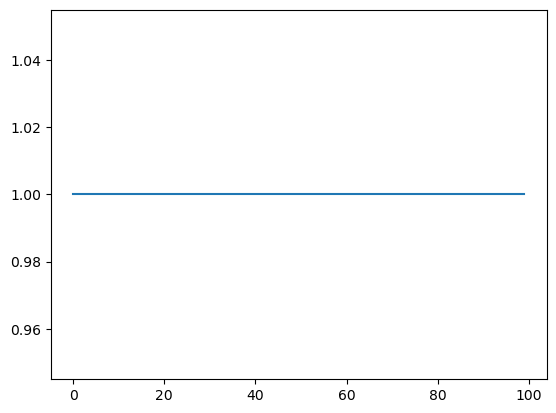

In [33]:
plt.plot(train_episode_returns)

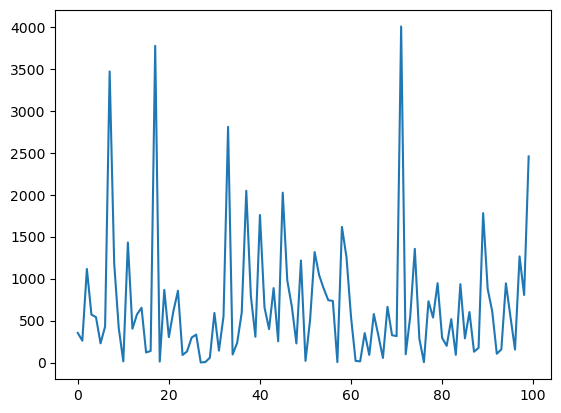

In [34]:
plt.plot(train_episode_lengths)

In [ ]:
plt.plot(test_episode_returns)

In [ ]:
plt.plot(test_episode_lengths)